# GPR model - Frequency and time domain

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import empymod as epm

## Plot settings

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 8

save = False


def create_axis(nr, title, frequency):
    """Create subplot; do some adjustments."""
    # Create subplot and add title
    ax = plt.subplot(nr)
    ax.set_title(title)
    
    # Show horizontal gridlines, switch off frame
    ax.grid(axis='y', color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Limits and ticks
    if frequency:
        ax.set_xticks([0, 200, 400, 600, 800])
        ax.set_xlim([0, 850])
    else:
        ax.set_xticks([0, 20, 40, 60, 80])
        ax.set_xlim([0, 80])

    # Labels
    if frequency:
        ax.set_xlabel('Frequency (MHz)')
    else:
        ax.set_xlabel('Time (ns)')
    ax.set_ylabel('Amplitude')

    return ax

In [3]:
def ricker(data):
    """Multiply freq-result with Ricker wavelet.
    
    For the time-domain result, this is done in empymod.model.gpr.
    """
    cf = 250e6
    cfc = -(np.r_[0, f[:-1]]/cf)**2
    fwave = cfc*np.exp(cfc)
    return data*fwave[:, None]

## Calculate/get data f-domain
Parameters as in Hunziker et al., 2015

In [4]:
f = np.linspace(0.5, 850, 300)*1e6
finp = {'src': [0, 0, 0.0000001],
        'rec': [[0.2, 2.0, 3.0], [0, 0, 0], 0.5],
        'depth': [0, 1],
        'res': [2e14, 200, 20],
        'ab': 11,
        'epermH': [1, 9, 15],
        'epermV': [1, 9, 15],
        'loop': 'off', 'verb': 2, 'freqtime': f, 'opt': 'spline'}

In [5]:
try:
    fgprDLF = np.load('data/GPR-DLF-Frequency.npy')
except:
    fgprDLF = epm.dipole(ht='fht', htarg=epm.fdesign.load_filter('wer2001'), **finp)
    fgprDLF = ricker(fgprDLF)
    np.save('data/GPR-DLF-Frequency', fgprDLF)
try:
    fgprQUA = np.load('data/GPR-QUA-Frequency.npy') 
except:
    fgprQUA = epm.dipole(ht='quad', htarg=['', '', 51, '', 160, 500], **finp)
    fgprQUA = ricker(fgprQUA)
    np.save('data/GPR-QUA-Frequency', fgprQUA)

## Calculate/get data t-domain
Parameters as in Hunziker et al., 2015

In [6]:
# Check indices for offsets of 0.2, 2, and 3 m.
x = np.r_[0.001, np.arange(1, 201)*.02]  # Offsets as used in GPR-create-data.ipynb
print(x[10], x[100], x[150])

t = np.r_[0.001, np.arange(1, 321)]/4*1e-9  # Times as used in GPR-create-data.ipynb

# Load data
gprQUA = np.load('data/GPR-QUA.npy')
gprDLF = np.load('data/GPR-DLF.npy')

0.2 2.0 3.0


## Plot

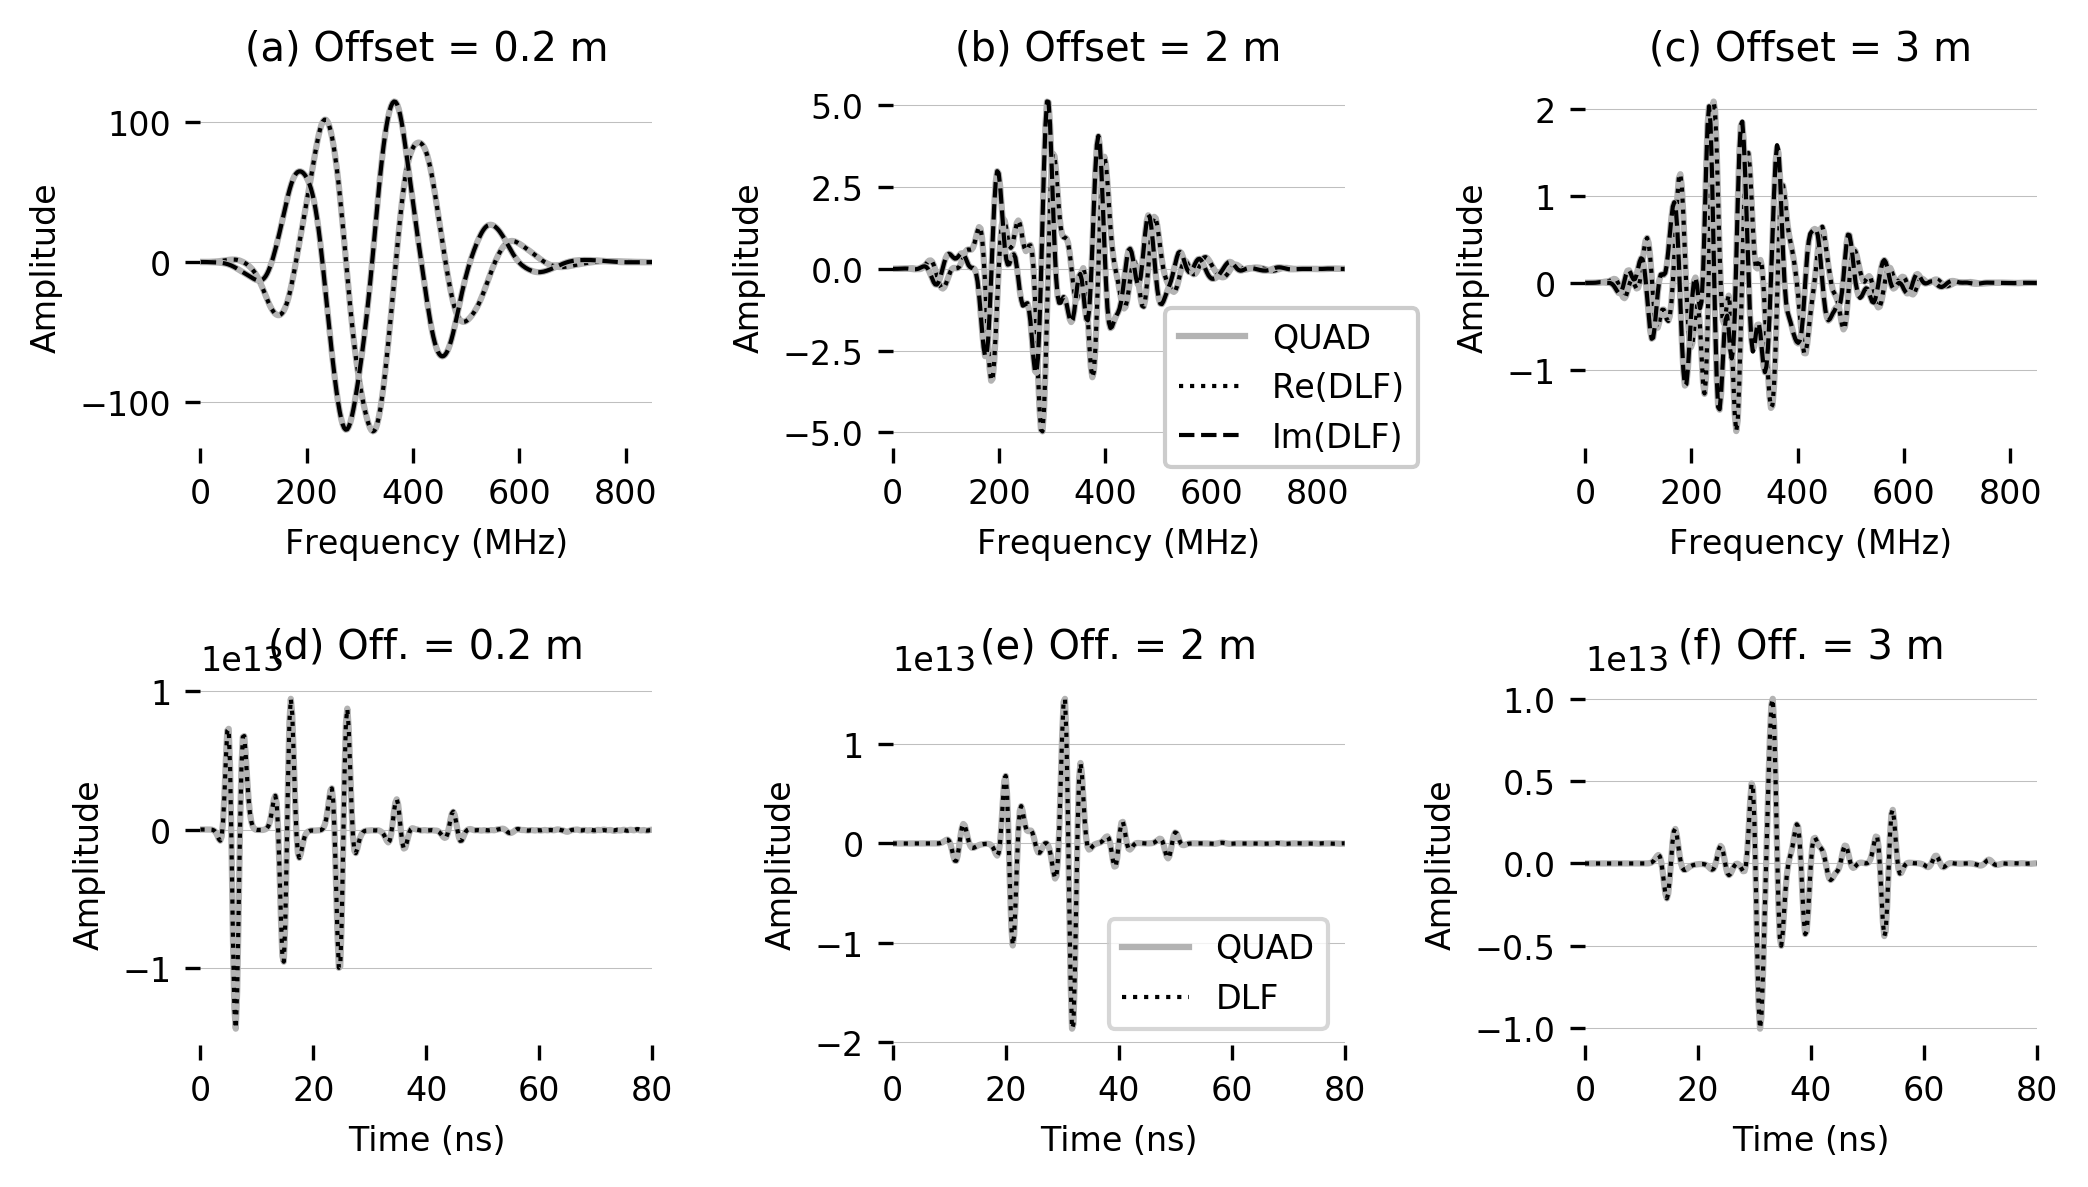

In [7]:
plt.figure(figsize=(7, 4))
xlim = [1, 850]

# f-domain

# 1: x = 0.2 m ; Response
ax1 = create_axis(231, '(a) Offset = 0.2 m', True)

plt.plot(f/1e6, fgprQUA[:, 0].real, '.7', lw=1.5)
plt.plot(f/1e6, fgprDLF[:, 0].real, 'k:', lw=1)
plt.plot(f/1e6, fgprQUA[:, 0].imag, '.7', lw=1.5)
plt.plot(f/1e6, fgprDLF[:, 0].imag, 'k--', lw=1)

# 2: x = 2 m ; Response
ax2 = create_axis(232, '(b) Offset = 2 m', True)

plt.plot(f/1e6, fgprQUA[:, 1].real, '.7', lw=1.5, label='QUAD')
plt.plot(f/1e6, fgprDLF[:, 1].real, 'k:', lw=1, label='Re(DLF)')
plt.plot(f/1e6, fgprQUA[:, 1].imag, '.7', lw=1.5)
plt.plot(f/1e6, fgprDLF[:, 1].imag, 'k--', lw=1, label='Im(DLF)')

plt.legend(loc=4, framealpha=1, bbox_to_anchor=(1.2, -0.1))


# 3: x = 3 m ; Response
ax3 = create_axis(233, '(c) Offset = 3 m', True)

plt.plot(f/1e6, fgprQUA[:, 2].real, '.7', lw=1.5)
plt.plot(f/1e6, fgprDLF[:, 2].real, 'k:', lw=1)
plt.plot(f/1e6, fgprQUA[:, 2].imag, '.7', lw=1.5)
plt.plot(f/1e6, fgprDLF[:, 2].imag, 'k--', lw=1)


# t-domain

# 1: x = 0.2 m ; Response
ax4 = create_axis(234, '(d) Off. = 0.2 m', False)

plt.plot(t*1e9, gprQUA[:, 10], '.7', lw=1.5)
plt.plot(t*1e9, gprDLF[:, 10], 'k:', lw=1)

# 2: x = 2 m ; Response
ax5 = create_axis(235, '(e) Off. = 2 m', False)

plt.plot(t*1e9, gprQUA[:, 100], '.7', lw=1.5, label='QUAD')
plt.plot(t*1e9, gprDLF[:, 100], 'k:', lw=1, label='DLF')

plt.legend(loc=4)


# 3: x = 3 m ; Response
ax6 = create_axis(236, r'(f) Off. = 3 m', False)

plt.plot(t*1e9, gprQUA[:, 150], '.7', lw=1.5)
plt.plot(t*1e9, gprDLF[:, 150], 'k:', lw=1)

plt.tight_layout(h_pad=2, w_pad=1)

# Save figure and show it
if save:
    for ending in ['png', 'pdf', 'eps']:
        plt.savefig('../figures/Figure-10-bw.'+ending, bbox_inches='tight')

plt.show()

## Calculate/get data f-domain of 2nd model

In [8]:
f = np.linspace(0.5, 850, 300)*1e6
finp = {'src': [0, 0, 0.0000001],
        'rec': [[0.2, 2.0, 3.0], [0, 0, 0], 0.5],
        'depth': [0, 1],
        'res': [2e14, 20, 200],
        'ab': 11,
        'epermH': [1, 15, 9],
        'epermV': [1, 15, 9],
        'loop': 'off', 'verb': 2, 'freqtime': f, 'opt': 'spline'}

In [9]:
try:
    fgprDLF2 = np.load('data/GPR-DLF-Frequency2.npy')
except:
    fgprDLF2 = epm.dipole(ht='fht', htarg=epm.fdesign.load_filter('wer2001'), **finp)
    fgprDLF2 = ricker(fgprDLF2)
    np.save('data/GPR-DLF-Frequency2', fgprDLF2)
try:
    fgprQUA2 = np.load('data/GPR-QUA-Frequency2.npy')
except:
    fgprQUA2 = epm.dipole(ht='quad', htarg=['', '', 51, '', 160, 500], **finp)
    fgprQUA2 = ricker(fgprQUA2)
    np.save('data/GPR-QUA-Frequency2', fgprQUA2)

In [10]:
# Multiply with ricker wavelet
cf = 250e6
cfc = -(np.r_[0, f[:-1]]/cf)**2
fwave = cfc*np.exp(cfc)
fgprDLF2 *= fwave[:, None]
fgprQUA2 *= fwave[:, None]

## Plot

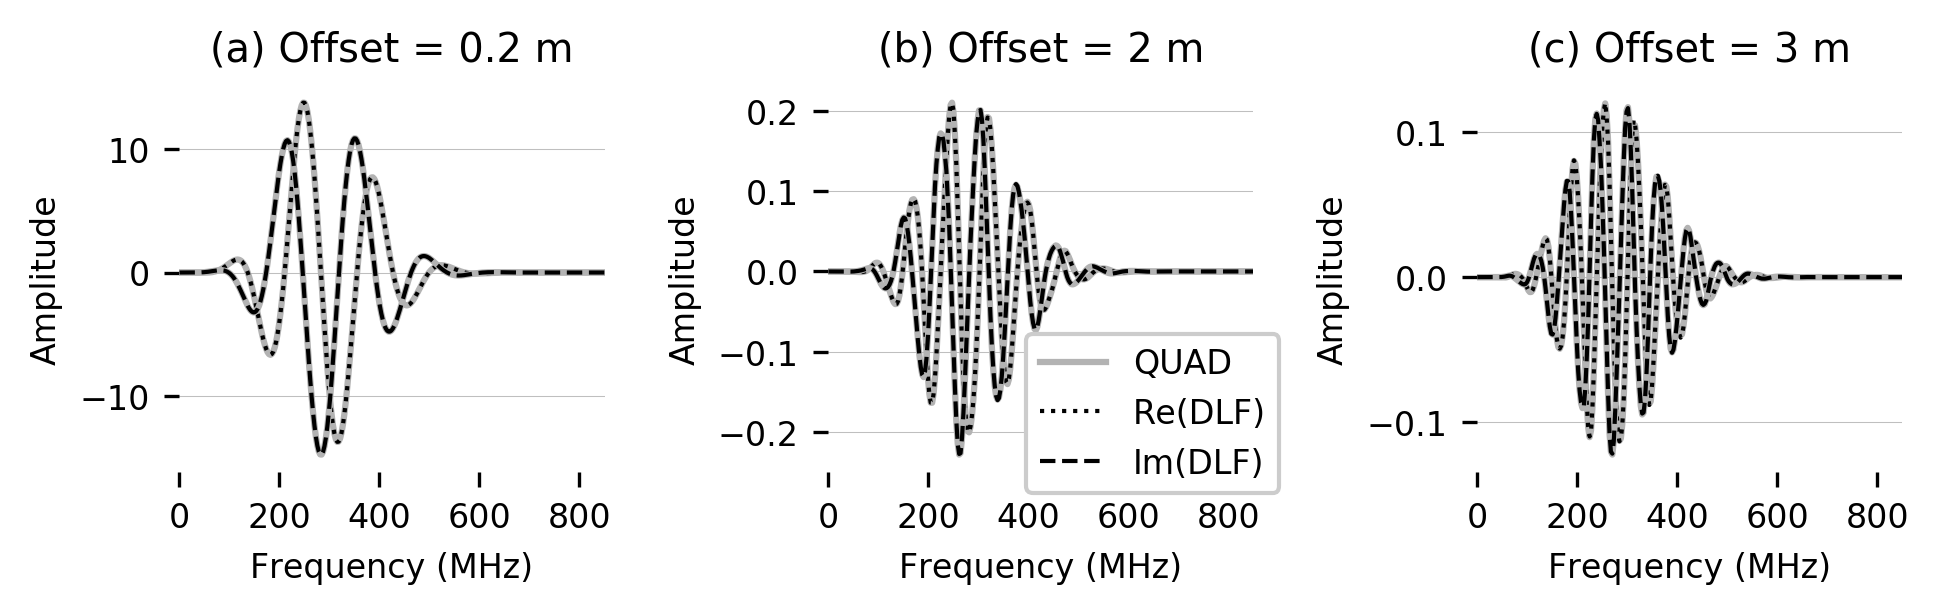

In [11]:
plt.figure(figsize=(6.5, 3.5))

# f-domain

# 1: x = 0.2 m ; Response
ax1 = create_axis(231, '(a) Offset = 0.2 m', True)

plt.plot(f/1e6, fgprQUA2[:, 0].real, '.7', lw=1.5, label='QUAD')
plt.plot(f/1e6, fgprDLF2[:, 0].real, 'k:', lw=1, label='DLF')
plt.plot(f/1e6, fgprQUA2[:, 0].imag, '.7', lw=1.5)
plt.plot(f/1e6, fgprDLF2[:, 0].imag, 'k--', lw=1, label='DLF')


# 2: x = 2 m ; Response
ax2 = create_axis(232, '(b) Offset = 2 m', True)

plt.plot(f/1e6, fgprQUA2[:, 1].real, '.7', lw=1.5, label='QUAD')
plt.plot(f/1e6, fgprDLF2[:, 1].real, 'k:', lw=1, label='Re(DLF)')
plt.plot(f/1e6, fgprQUA2[:, 1].imag, '.7', lw=1.5)
plt.plot(f/1e6, fgprDLF2[:, 1].imag, 'k--', lw=1, label='Im(DLF)')

plt.legend(loc=1, framealpha=1, bbox_to_anchor=(1.1, 0.4))


# 3: x = 3 m ; Response
ax3 = create_axis(233, '(c) Offset = 3 m', True)

plt.plot(f/1e6, fgprQUA2[:, 2].real, '.7', lw=1.5, label='QUAD')
plt.plot(f/1e6, fgprDLF2[:, 2].real, 'k:', lw=1, label='DLF')
plt.plot(f/1e6, fgprQUA2[:, 2].imag, '.7', lw=1.5)
plt.plot(f/1e6, fgprDLF2[:, 2].imag, 'k--', lw=1, label='DLF')


plt.tight_layout()

# Save figure and show it
if save:
    for ending in ['png', 'pdf', 'eps']:
        plt.savefig('../figures/Figure-11-bw.'+ending, bbox_inches='tight')
plt.show()

In [12]:
epm.versions('HTML')